**<hr><h>Capstone Project: Battle of Texas city living for young adults<h><hr>**

**Project Objective:**

The Objective of this project is to determine the best city that provides conveniences for young adults in Texas. The major cities being considered are Austin, Dallas, Houston and San Antonio. The  criteria to be considered are venues for restaurants, activities like yoga, parks accessibility for biking.  |

**Methodology:**

The data to be used is the coordinates from the center of downtown and the venues to be considered are data from Foursquare. A 3.1 mile (5Km) radius from the center of downtown will be considered for the analysis. The clusters will look at type, location ratings and accessibility of these conveniences being considered for young adults.
A report will analyze using metrics and plots to compare and discuss pro and cons of these four cities being considered.

**Input Coordinates table of TX cities into Pandas**

In [2]:
import pandas as pd
df = pd.read_csv("TXcities.csv")
df.head()

,TX_City,Latitude,Longitude
0,Austin,30.267153,-97.743057
1,Downtown Houston,29.751869,-95.327438
2,Downtown Dallas,32.776665,-96.796989
3,Downtown San Antonio,29.424122,-98.493629


**Setup Libraries for Data Analysis and Visualization**

In [3]:
! pip install --upgrade pip
! pip install beautifulsoup4
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda update -n base -c defaults conda --yes
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 1.4MB 27.6MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
     |████████████████████████████████| 102kB 7.0MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          

**Import Foursquare Credentials**

In [4]:
CLIENT_ID = '55ELXDS21BUOO4A2LBRM4T35UEOVCOFUYKG0KXTIPUI5OIWU' # your Foursquare ID
CLIENT_SECRET = 'KQO5CBRZRY1IDSUGQZOAPU0RR5QDG5A55DZAW4FOMSTPARLJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 55ELXDS21BUOO4A2LBRM4T35UEOVCOFUYKG0KXTIPUI5OIWU
CLIENT_SECRET:KQO5CBRZRY1IDSUGQZOAPU0RR5QDG5A55DZAW4FOMSTPARLJ


In [31]:
address = 'Austin, TX'

geolocator = Nominatim(user_agent="tx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin, TX are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin, TX are 30.2711286, -97.7436995.


**Create map of four TX cities for analysis**

In [34]:
# create map of Tx Cities using latitude and longitude values
map_tx = folium.Map(location=[latitude, longitude], zoom_start=6.49)

# add markers to map
for lat, lng, TX_city in zip(df['Latitude'], df['Longitude'],  df['TX_City']):
   #label = '{}, {}'.format(Neighborhood, borough)
   # label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tx)  
    
map_tx

In [35]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'TX_City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                              neighborhood_longitude))

Latitude and longitude values of Austin are 30.267153000000004, -97.743057.


**Create URL of venues within 3.1 Miles of Austin center**

In [36]:
#Double-click __here__ for the solution.
#<!-- The correct answer is:
LIMIT = 200 # limit of number of venues returned by Foursquare API
#-->

#<!--
radius = 10000 # define radius
#-->

#<!--
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
#--> 

'https://api.foursquare.com/v2/venues/explore?&client_id=55ELXDS21BUOO4A2LBRM4T35UEOVCOFUYKG0KXTIPUI5OIWU&client_secret=KQO5CBRZRY1IDSUGQZOAPU0RR5QDG5A55DZAW4FOMSTPARLJ&v=20180604&ll=30.267153000000004,-97.743057&radius=10000&limit=200'

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
nbh_venues = getNearbyVenues(names=df['TX_City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


Austin
Downtown Houston
Downtown Dallas
Downtown San Antonio


In [41]:
print(nbh_venues.shape)
nbh_venues.head()


(400, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Austin,30.267153,-97.743057,JuiceLand,30.266037,-97.742623,Juice Bar
1,Austin,30.267153,-97.743057,The Roosevelt Room,30.267842,-97.746242,Bar
2,Austin,30.267153,-97.743057,Houndstooth Coffee,30.266194,-97.743025,Coffee Shop
3,Austin,30.267153,-97.743057,Eddie V's Prime Seafood,30.266339,-97.740504,Seafood Restaurant
4,Austin,30.267153,-97.743057,Alamo Drafthouse Cinema,30.267460,-97.739550,Movie Theater


**City/ Neighborhood Data Wrangling and Analysis**

**Remove Hotels since it's Common**

In [42]:
nbh_venues=nbh_venues[nbh_venues['Venue Category'] !='Hotel'] #look through column to remove hotels
nbh_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Austin,30.267153,-97.743057,JuiceLand,30.266037,-97.742623,Juice Bar
1,Austin,30.267153,-97.743057,The Roosevelt Room,30.267842,-97.746242,Bar
2,Austin,30.267153,-97.743057,Houndstooth Coffee,30.266194,-97.743025,Coffee Shop
3,Austin,30.267153,-97.743057,Eddie V's Prime Seafood,30.266339,-97.740504,Seafood Restaurant
4,Austin,30.267153,-97.743057,Alamo Drafthouse Cinema,30.267460,-97.739550,Movie Theater


In [43]:
nbh_venues['Venue Type'] = nbh_venues['Venue Category']
nbh_cnt = nbh_venues.groupby(['Neighborhood','Venue Category' ]).count()['Venue Type'].sort_values(ascending=False).reset_index()
#nbh_cnt.drop('Hotel')
nbh_cnt.head(38)

,Neighborhood,Venue Category,Venue Type
0,Downtown Houston,Mexican Restaurant,11
1,Downtown Houston,Bar,10
2,Downtown Dallas,Coffee Shop,8
3,Downtown Dallas,Steakhouse,6
4,Austin,Coffee Shop,5
5,Downtown San Antonio,American Restaurant,5
6,Austin,Food Truck,5
7,Downtown Dallas,Bar,5
8,Downtown Houston,Music Venue,4
9,Downtown Houston,Beer Garden,4


In [44]:
nbh_cnt.astype({'Venue Type': 'int32'}).dtypes
nbh_cnt3 = nbh_cnt[nbh_cnt['Venue Type']>2]
pivot_nbh = nbh_cnt3.pivot(index='Venue Category', columns='Neighborhood', values='Venue Type').fillna(0)
nbh_cnt4 = nbh_cnt[nbh_cnt['Venue Type']>3]
pivot_nbh2 = nbh_cnt4.pivot(index='Venue Category', columns='Neighborhood', values='Venue Type').fillna(0)


In [45]:
pivot_nbh.head(40)

Neighborhood,Austin,Downtown Dallas,Downtown Houston,Downtown San Antonio
Venue Category,,,,
American Restaurant,0.0,4.0,0.0,5.0
Bar,3.0,5.0,10.0,0.0
Baseball Stadium,0.0,0.0,3.0,0.0
Beer Garden,0.0,0.0,4.0,0.0
Brewery,0.0,0.0,3.0,0.0
Burger Joint,0.0,3.0,0.0,0.0
Cocktail Bar,3.0,3.0,0.0,4.0
Coffee Shop,5.0,8.0,0.0,0.0
Food Truck,5.0,0.0,0.0,0.0


In [46]:
pivot_nbh2.head(40)

Neighborhood,Austin,Downtown Dallas,Downtown Houston,Downtown San Antonio
Venue Category,,,,
American Restaurant,0.0,4.0,0.0,5.0
Bar,0.0,5.0,10.0,0.0
Beer Garden,0.0,0.0,4.0,0.0
Cocktail Bar,0.0,0.0,0.0,4.0
Coffee Shop,5.0,8.0,0.0,0.0
Food Truck,5.0,0.0,0.0,0.0
Grocery Store,4.0,0.0,0.0,0.0
Mexican Restaurant,0.0,0.0,11.0,4.0
Music Venue,0.0,0.0,4.0,0.0


**Plot of 3 or more venues for Cities**

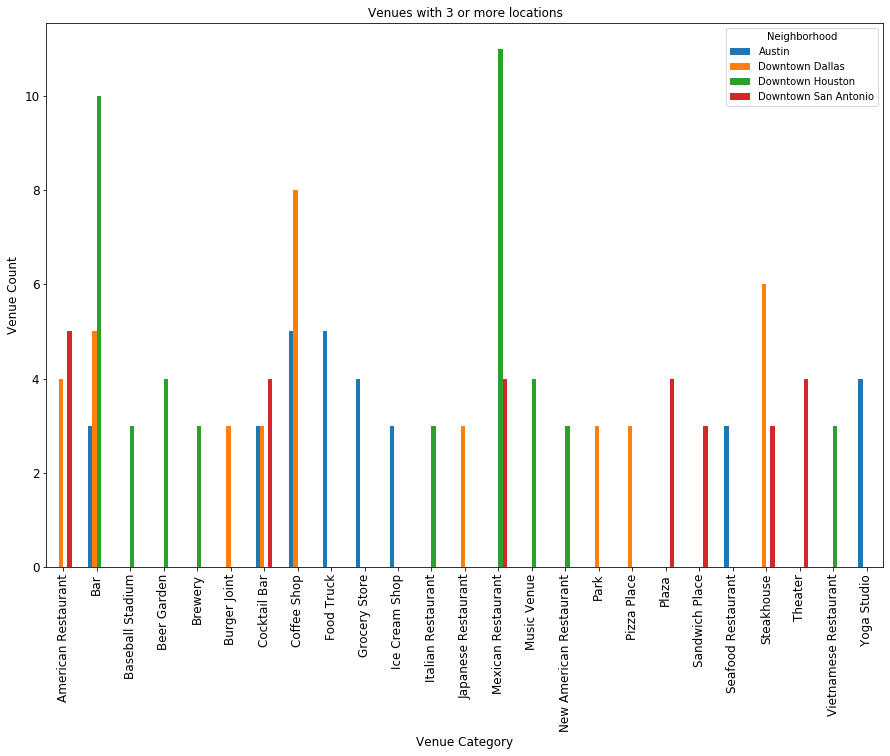

In [47]:
import matplotlib.pyplot as plt
ax = pivot_nbh.plot(kind='bar', title ="Venues with 3 or more locations", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Venue Category", fontsize=12)
ax.set_ylabel("Venue Count", fontsize=12)
#ax.legend('Neighborhood', loc=2)
plt.show()

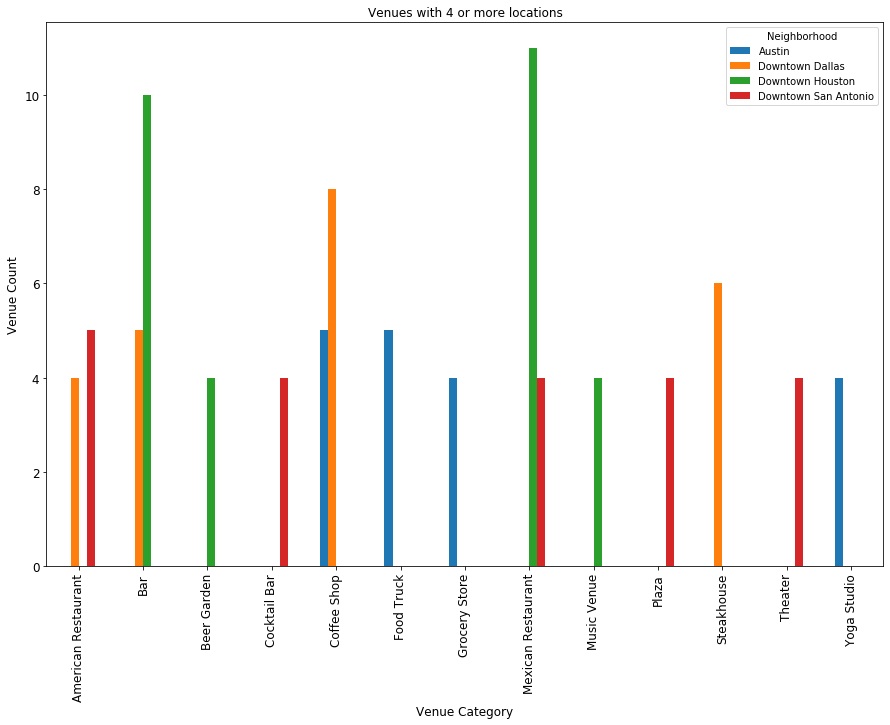

In [48]:
ax2 = pivot_nbh2.plot(kind='bar', title ="Venues with 4 or more locations", figsize=(15, 10), legend=True, fontsize=12)
ax2.set_xlabel("Venue Category", fontsize=12)
ax2.set_ylabel("Venue Count", fontsize=12)
#ax.legend('Neighborhood', loc=2)
plt.show()

**Transpose dara and plot of 4 or more locations**

In [96]:
pivot2= pivot_nbh2.T
pivot2

Venue Category,American Restaurant,Bar,Beer Garden,Cocktail Bar,Coffee Shop,Food Truck,Grocery Store,Mexican Restaurant,Music Venue,Plaza,Steakhouse,Theater,Yoga Studio
Neighborhood,,,,,,,,,,,,,
Austin,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Downtown Dallas,4.0,5.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
Downtown Houston,0.0,10.0,4.0,0.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0
Downtown San Antonio,5.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0


**Plot of Venues with 4 or more location**

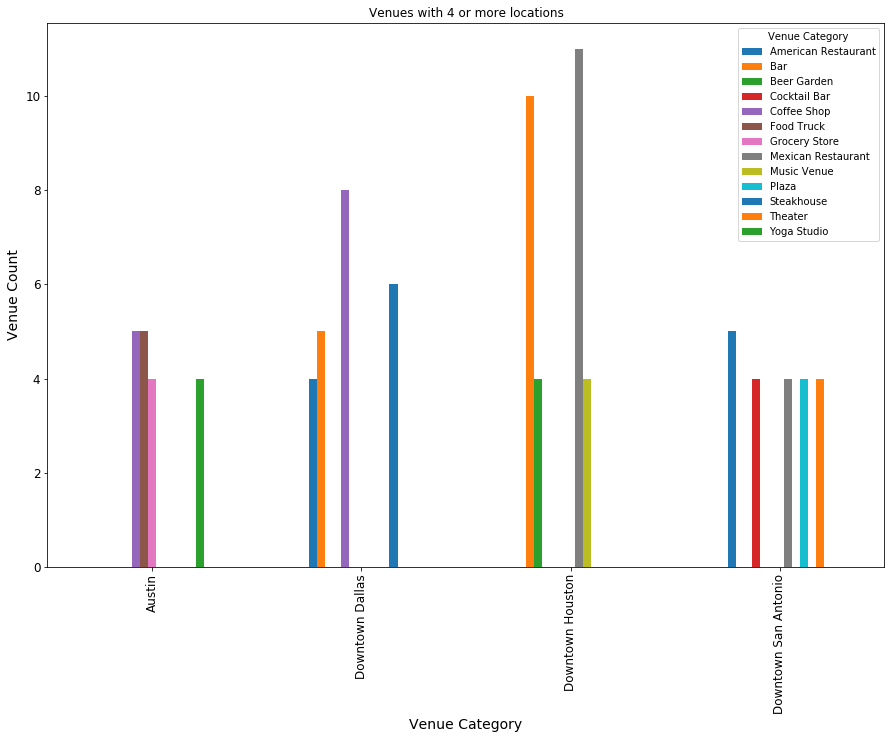

<Figure size 432x288 with 0 Axes>

In [85]:
ax2 = pivot2.plot(kind='bar', title ="Venues with 4 or more locations",figsize=(15, 10), legend=True, fontsize=12)
fig=plt.figure()
ax2.set_xlabel("Venue Category", fontsize=14)
ax2.set_ylabel("Venue Count", fontsize=14)
plt.show()

In [51]:
nbh_cnt4.sort_values(by='Neighborhood', ascending=False)

,Neighborhood,Venue Category,Venue Type
16,Downtown San Antonio,Theater,4
15,Downtown San Antonio,Plaza,4
11,Downtown San Antonio,Cocktail Bar,4
10,Downtown San Antonio,Mexican Restaurant,4
5,Downtown San Antonio,American Restaurant,5
1,Downtown Houston,Bar,10
9,Downtown Houston,Beer Garden,4
0,Downtown Houston,Mexican Restaurant,11
8,Downtown Houston,Music Venue,4
7,Downtown Dallas,Bar,5


In [52]:
nbh_cnt3.sort_values(by='Neighborhood', ascending=False)

,Neighborhood,Venue Category,Venue Type
16,Downtown San Antonio,Theater,4
15,Downtown San Antonio,Plaza,4
28,Downtown San Antonio,Sandwich Place,3
27,Downtown San Antonio,Steakhouse,3
5,Downtown San Antonio,American Restaurant,5
10,Downtown San Antonio,Mexican Restaurant,4
11,Downtown San Antonio,Cocktail Bar,4
26,Downtown Houston,New American Restaurant,3
20,Downtown Houston,Italian Restaurant,3
19,Downtown Houston,Vietnamese Restaurant,3


**Determine Number of Categories**

In [91]:
print('There are {} uniques categories.'.format(len(nbh_venues['Venue Category'].unique())))

There are 122 uniques categories.


In [92]:
# one hot encoding
nbh_onehot = pd.get_dummies(nbh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nbh_onehot['Neighborhood'] = nbh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nbh_onehot.columns[-1]] + list(nbh_onehot.columns[:-1])
nbh_onehot = nbh_onehot[fixed_columns]

nbh_onehot.head()

,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Café,Cajun / Creole Restaurant,Capitol Building,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Farmers Market,Field,Flea Market,Food Court,Food Truck,French Restaurant,Gaming Cafe,Garden Center,Gas Station,Gastropub,General College & University,German Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Historic Site,History Museum,Hostel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Piano Bar,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Snack Place,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Austin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Austin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Austin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Austin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
nbh_grouped = nbh_onehot.groupby('Neighborhood').mean().reset_index()
nbh_grouped.shape
nbh_grouped.head()

,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Café,Cajun / Creole Restaurant,Capitol Building,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Farmers Market,Field,Flea Market,Food Court,Food Truck,French Restaurant,Gaming Cafe,Garden Center,Gas Station,Gastropub,General College & University,German Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Historic Site,History Museum,Hostel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Piano Bar,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Snack Place,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Austin,0.021277,0.010638,0.000000,0.000000,0.021277,0.000000,0.031915,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.010638,0.021277,0.000000,0.010638,0.021277,0.000000,0.000000,0.031915,0.053191,0.010638,0.000000,0.000000,0.010638,0.021277,0.010638,0.010638,0.000000,0.000000,0.021277,0.010638,0.000000,0.010638,0.000000,0.010638,0.053191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.010638,0.000000,0.000000,0.010638,0.010638,0.000000,0.031915,0.000000,0.010638,0.021277,0.000000,0.010638,0.010638,0.010638,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.021277,0.000000,0.021277,0.010638,0.000000,0.021277,0.000000,0.010638,0.000000,0.010638,0.010638,0.000000,0.021277,0.010638,0.000000,0.000000,0.010638,0.000000,0.031915,0.000000,0.000000,0.000000,0.000000,0.010638,0.010638,0.021277,0.000000,0.010638,0.000000,0.021277,0.000000,0.000000,0.010638,0.000000,0.010638,0.010638,0.000000,0.000000,0.042553
1,Downtown Dallas,0.042553,0.021277,0.000000,0.010638,0.010638,0.010638,0.053191,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.010638,0.021277,0.000000,0.031915,0.010638,0.000000,0.000000,0.000000,0.010638,0.031915,0.085106,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.010638,0.010638,0.021277,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.010638,0.010638,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.010638,0.000000,0.010638,0.000000,0.000000,0.031915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.010638,0.021277,0.000000,0.000000,0.000000,0.010638,0.031915,0.000000,0.021277,0.000000,0.000000,0.031915,0.010638,0.010638,0.000000,0.000000,0.000000,0.010638,0.010638,0.010638,0.010638,0.000000,0.010638,0.010638,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.063830,0.010638,0.010638,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.010638,0.010638
2,Downtown Houston,0.010638,0.000000,0.010638,0.000000,0.010638,0.010638,0.106383,0.031915,0.010638,0.021277,0.042553,0.010

**Top 20 Venues by City (Neighborhood)**

In [94]:
num_top_venues = 20
for hood in nbh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nbh_grouped[nbh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Austin----
                    venue  freq
0             Coffee Shop  0.05
1              Food Truck  0.05
2             Yoga Studio  0.04
3           Grocery Store  0.04
4                     Bar  0.03
5          Ice Cream Shop  0.03
6            Cocktail Bar  0.03
7      Seafood Restaurant  0.03
8             Pizza Place  0.02
9   Performing Arts Venue  0.02
10                   Park  0.02
11       Capitol Building  0.02
12     Italian Restaurant  0.02
13             Restaurant  0.02
14                    Gym  0.02
15    Sporting Goods Shop  0.02
16               Dive Bar  0.02
17         Cosmetics Shop  0.02
18             Taco Place  0.02
19          Movie Theater  0.02


----Downtown Dallas----
                              venue  freq
0                       Coffee Shop  0.09
1                        Steakhouse  0.06
2                               Bar  0.05
3               American Restaurant  0.04
4                       Pizza Place  0.03
5               Japanese Restaurant

In [99]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Top 10 Venues by City (Neighborhood)**

In [107]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nbh_grouped['Neighborhood']

for ind in np.arange(nbh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nbh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austin,Food Truck,Coffee Shop,Yoga Studio,Grocery Store,Cocktail Bar,Ice Cream Shop,Seafood Restaurant,Bar,Capitol Building,Burger Joint
1,Downtown Dallas,Coffee Shop,Steakhouse,Bar,American Restaurant,Park,Japanese Restaurant,Pizza Place,Burger Joint,Cocktail Bar,Southern / Soul Food Restaurant
2,Downtown Houston,Mexican Restaurant,Bar,Beer Garden,Music Venue,Vietnamese Restaurant,Brewery,New American Restaurant,Baseball Stadium,Italian Restaurant,Beer Bar
3,Downtown San Antonio,American Restaurant,Theater,Plaza,Mexican Restaurant,Cocktail Bar,Sandwich Place,Steakhouse,Museum,Restaurant,Seafood Restaurant


In [108]:
nbh_venues_tposed=neighborhoods_venues_sorted.T
nbh_venues_tposed.head(12)

,0,1,2,3
Neighborhood,Austin,Downtown Dallas,Downtown Houston,Downtown San Antonio
1st Most Common Venue,Food Truck,Coffee Shop,Mexican Restaurant,American Restaurant
2nd Most Common Venue,Coffee Shop,Steakhouse,Bar,Theater
3rd Most Common Venue,Yoga Studio,Bar,Beer Garden,Plaza
4th Most Common Venue,Grocery Store,American Restaurant,Music Venue,Mexican Restaurant
5th Most Common Venue,Cocktail Bar,Park,Vietnamese Restaurant,Cocktail Bar
6th Most Common Venue,Ice Cream Shop,Japanese Restaurant,Brewery,Sandwich Place
7th Most Common Venue,Seafood Restaurant,Pizza Place,New American Restaurant,Steakhouse
8th Most Common Venue,Bar,Burger Joint,Baseball Stadium,Museum
9th Most Common Venue,Capitol Building,Cocktail Bar,Italian Restaurant,Restaurant
